NAME : RUDRAJIT DAS |
REGISTRATION NUMBER : 22MCB0008 |
SUBJECT : SOCIAL NETWORK ANALYTICS |
TOPIC : COMMUNITY DETECTION ALGORITHM IN SOCIAL NETWORK GROUPS


In [2]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Step 1: Load the text dataset
# Assuming you have a .txt file named 'dataset.txt' containing one document per line
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()



In [3]:
# Step 2: Preprocess the text data
# Assuming you have already preprocessed the text data by removing stopwords, punctuation, etc.
# If not, you can implement preprocessing steps here

In [4]:
# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

In [5]:
# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)

LatentDirichletAllocation(n_components=5)

In [6]:
# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)

In [7]:
# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(documents):
    G.add_node(i, text=document, topic=topic_labels[i])

In [8]:
# Step 7: Apply the Girvan-Newman algorithm for community detection
communities = nx.community.girvan_newman(G)

In [9]:
# Step 8: Get the final community partition
partition = next(communities)

In [10]:
# Step 9: Visualize the graph with community colors
pos = nx.spring_layout(G)

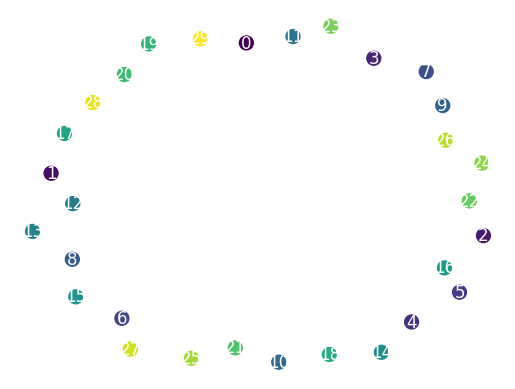

In [11]:
# Draw nodes with different community colors
node_colors = [idx for idx, comm in enumerate(partition) for _ in comm]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='viridis', node_size=100)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('off')
plt.show()

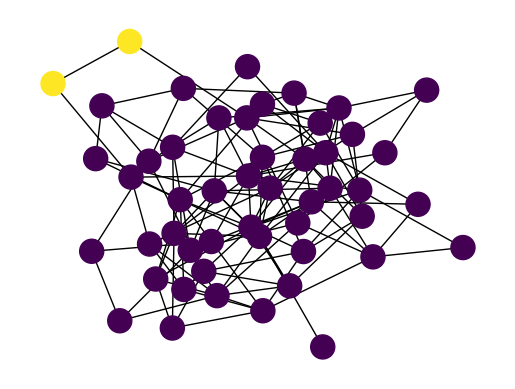

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Generate a random graph
G = nx.erdos_renyi_graph(50, 0.1)

# Apply the Newman-Girvan algorithm
comp = community.girvan_newman(G)

# Select the top-level community
top_level_communities = next(comp)

# Convert the top-level community into a dictionary
partition = {}
for idx, community_nodes in enumerate(top_level_communities):
    for node in community_nodes:
        partition[node] = idx

# Create a layout for visualizing the graph
layout = nx.spring_layout(G)

# Draw the nodes with community colors
node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, layout, node_color=node_colors, cmap='viridis')

# Draw the edges
nx.draw_networkx_edges(G, layout)

# Display the graph
plt.axis("off")
plt.show()



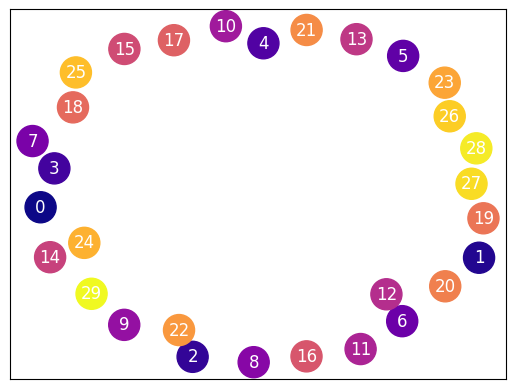

In [16]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from community import community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the text dataset
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()

# Step 2: Preprocess the text data

# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)

# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)

# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(documents):
    G.add_node(i, text=document, topic=topic_labels[i])

# Step 7: Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)
# Step 8: Visualize the graph with community colors
pos = nx.spring_layout(G)

# Get unique community labels
community_labels = set(partition.values())

# Draw nodes with different community colors
node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='plasma', node_size=500)

# Draw edges with community colors
edge_colors = ['blue' if partition[edge[0]] != partition[edge[1]] else 'viridis' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('on')
plt.show()


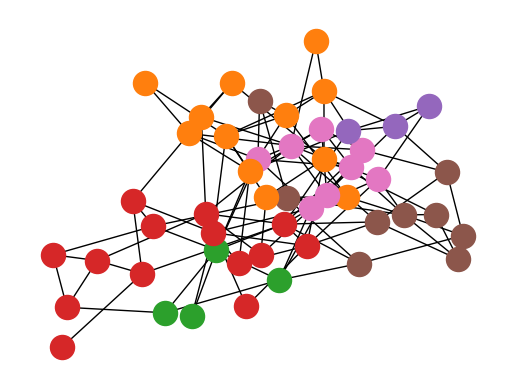

In [17]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# Generate a random graph
G = nx.erdos_renyi_graph(50, 0.1)

# Apply the Louvain community detection algorithm
partition = community_louvain.best_partition(G)

# Create a layout for visualizing the graph
layout = nx.spring_layout(G)

# Draw the nodes with community colors
for node, community_id in partition.items():
    nx.draw_networkx_nodes(G, layout, [node], node_color=f"C{community_id+1}")

# Draw the edges
nx.draw_networkx_edges(G, layout)

# Display the graph
plt.axis("off")
plt.show()
